In [1]:
import pandas as pd
import sqlite3
import seaborn as sns

In [2]:
#connexion db + création du cursor
connexion = sqlite3.connect("football.db")
c = connexion.cursor()

In [3]:
# 
# # tables :
# SELECT * FROM championships;
# SELECT * FROM teams;
# SELECT * FROM participations;
# SELECT * FROM contracts;
# SELECT * FROM players;
# SELECT * FROM matches
# SELECT * FROM matches_teams
# SELECT * FROM goals;
""""schéma DB : https://lucid.app/lucidchart/b61e952d-716c-461e-97a5-06d0e297d599/edit?shared=true&page=0_0#"""



#################################### A FAIRE ####################################  
# check si y'a pas de bug sur les données récups dans la db (certains joueur_id n'existent pas dans players donc ça met -1 , raifall = 9999 si la donnée est manquante) on améliore/modif ?
# [IMPORTANT] viz 
# [IMPORTANT] modèles prédiction (target : temperature ?) test d'avoir le best score avec un split train/test 
# refacto son code
#convertir les columns date qui sont en TEXT en DATETIME dans la db
# [IMPORTANT] problème sur les date scrapées ? elles sont toutes identiques
# autres trucs à faire ?


'"schéma DB : https://lucid.app/lucidchart/b61e952d-716c-461e-97a5-06d0e297d599/edit?shared=true&page=0_0#'

In [4]:
#exemple créer un df à partir d'une requete simple
df_exemple1 = pd.read_sql("SELECT * FROM matches;", connexion)
df_exemple1

,id,championship_id,date,place,rainfall,temperature
0,1,2,2020 08 21,Bordeaux,5.0,24.0
1,2,2,2020 08 22,Dijon,19.0,26.0
2,3,2,2020 08 22,Lille,1.0,21.0
3,4,2,2020 08 23,Monaco,1.0,27.0
4,5,2,2020 08 23,Lorient,1.0,19.0
...,...,...,...,...,...,...
375,376,2,2021 05 23,Rennes,2.0,15.0
376,377,2,2021 05 23,Nantes,1.0,16.0
377,378,2,2021 05 23,Saint-Étienne,0.0,17.0
378,379,2,2021 05 23,Reims,1.0,14.0


In [5]:
#exemple créer un df à partir d'une requete qui JOIN plusieures tables
df_exemple2 = pd.read_sql("""SELECT players.name, goals.goal_type, matches.temperature, matches.date, matches.place
                        FROM matches 
                        JOIN goals 
                        ON goals.match_id = matches.id
                        JOIN players 
                        ON players.id = goals.player_id;""", connexion)
df_exemple2

,name,goal_type,temperature,date,place
0,I.Traoré,normal,26.0,2020 08 22,Dijon
1,J.Bamba,normal,21.0,2020 08 22,Lille
2,D.DaSilva,normal,21.0,2020 08 22,Lille
3,A.Disasi,normal,27.0,2020 08 23,Monaco
4,B.Badiashile,normal,27.0,2020 08 23,Monaco
...,...,...,...,...,...
1026,E.Touré,normal,14.0,2021 05 23,Reims
1027,Y.Adli,normal,14.0,2021 05 23,Reims
1028,E.Kwateng,normal,14.0,2021 05 23,Reims
1029,H.Diallo,normal,16.0,2021 05 23,Strasbourg


In [6]:
#exemple créer un df à partir d'une requete qui JOIN plusieures tables
df_exemple3 = pd.read_sql("""SELECT matches.date, matches.place, count(goals.id) AS goals, matches.rainfall, matches.temperature
                        FROM matches 
                        JOIN goals 
                        ON goals.match_id = matches.id
                        JOIN players 
                        ON players.id = goals.player_id
                        GROUP BY matches.id;""", connexion)
df_exemple3

,date,place,goals,rainfall,temperature
0,2020 08 22,Dijon,1,19.0,26.0
1,2020 08 22,Lille,2,1.0,21.0
2,2020 08 23,Monaco,4,1.0,27.0
3,2020 08 23,Lorient,4,1.0,19.0
4,2020 08 23,Nîmes,3,99999.0,31.0
...,...,...,...,...,...
347,2021 05 23,Rennes,2,2.0,15.0
348,2021 05 23,Nantes,3,1.0,16.0
349,2021 05 23,Saint-Étienne,1,0.0,17.0
350,2021 05 23,Reims,3,1.0,14.0


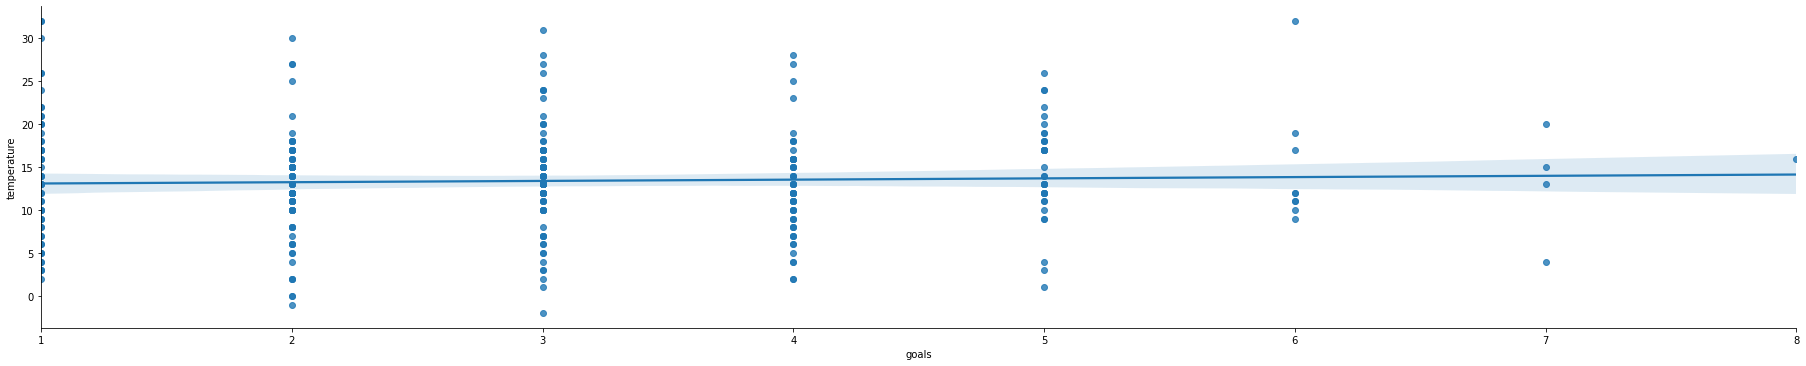

In [7]:
sns.lmplot(data=df_exemple3, x='goals', y='temperature', height=5, aspect=5)

In [8]:
df_exemple4 = pd.read_sql("""SELECT matches.date, matches.place, count(goals.id) AS goals, matches.rainfall, matches.temperature
                        FROM matches 
                        JOIN goals 
                        ON goals.match_id = matches.id
                        JOIN players 
                        ON players.id = goals.player_id
                        GROUP BY matches.date;""", connexion)
df_exemple4

,date,place,goals,rainfall,temperature
0,2020 08 22,Dijon,3,19.0,26.0
1,2020 08 23,Monaco,14,1.0,27.0
2,2020 08 28,Lyon,4,20.0,23.0
3,2020 08 29,Rennes,5,4.0,16.0
4,2020 08 30,Reims,13,2.0,20.0
...,...,...,...,...,...
93,2021 05 07,Lens,3,1.0,13.0
94,2021 05 08,Nantes,8,1.0,20.0
95,2021 05 09,Saint-Étienne,20,1.0,21.0
96,2021 05 16,Paris,30,3.0,16.0


In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [10]:
df_teams = pd.read_sql("SELECT city FROM teams GROUP BY city ORDER BY city;", connexion)

In [11]:
df_teams

,city
0,Angers
1,Bordeaux
2,Brest
3,Dijon
4,Lens
5,Lille
6,Lorient
7,Lyon
8,Marseille
9,Metz


In [12]:
list(df_teams["city"])

['Angers',
 'Bordeaux',
 'Brest',
 'Dijon',
 'Lens',
 'Lille',
 'Lorient',
 'Lyon',
 'Marseille',
 'Metz',
 'Monaco',
 'Montpellier',
 'Nantes',
 'Nice',
 'Nîmes',
 'Paris-SG',
 'Reims',
 'Rennes',
 'Saint-Étienne',
 'Strasbourg']

In [13]:
def g(city_name):
    return city_name

In [14]:
interact(g, city_name=list(df_teams["city"]));

interactive(children=(Dropdown(description='city_name', options=('Angers', 'Bordeaux', 'Brest', 'Dijon', 'Lens…

In [22]:
team = str(g.widget.out)
teams = team.split(" ")
team = teams[4][2:len(teams[4]) - 4]
df_team = pd.read_sql(f"""SELECT team_goal, AVG(rainfall) AS rainfall, AVG(temperature) AS temperature
                                FROM matches_teams
                                JOIN teams
                                ON matches_teams.team_id = teams.id
                                JOIN matches
                                ON matches_teams.match_id = matches.id
                                WHERE city = '{team}'
                                AND rainfall!= 99999                                                               
                                GROUP BY team_goal
                                ORDER BY team_goal;""", connexion)
df_team

,team_goal,rainfall,temperature
0,0,3.700000,13.4
1,1,4.333333,12.5
2,2,1.428571,12.0
3,3,6.600000,13.2


In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
 
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
 
# Add traces
fig.add_trace(
    go.Scatter(x=df_team['team_goal'], y=df_team['rainfall'], name="rainfall"),
    secondary_y=False,
)
 
fig.add_trace(
    go.Scatter(x=df_team['team_goal'], y=df_team['temperature'], name="temperature"),
    secondary_y=True,
)
 
# Add figure title
fig.update_layout(
    title_text=f"Buts en fonction de la météo pour l'équipe : {team}"
)
 
# Set x-axis title
fig.update_xaxes(title_text="goals")
 
# Set y-axes titles
fig.update_yaxes(title_text="<b>rainfall</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>temperature</b>", secondary_y=True)

 

fig.show()